# Analiza podatkov pri predmetu PROGRAMIRANJE 1


## Priprava
Tukaj se nahaja drugi del projekta pri predmetu programiranje 1. Analiza podatkov, ki sem jih zajel s pomočjo Pythona na strani Goodreads. Upam, da se vam bodo zdeli izsledki analize zanimivi.

Za začetek si pripravimo vse potrebno.

In [91]:
# uvozimo knjižnico pandas za analizo podatkov
import pandas as pd
# uvozimo knjižnico za risanje grafov
import matplotlib.pyplot as plt
# poskrbimo, da se grafi izrisujejo v notebooku
%matplotlib inline
# nastavimo velikost grafov
plt.rcParams['figure.figsize'] = (15, 10)
# nastavimo, da nam izpiše le 20 podatkov v tabeli
pd.options.display.max_rows = 20

# uvozimo csv s knjigami in z avtorji z uporabo knjižnice pandas
knjige = pd.read_csv("html_strani_in_csv/knjige.csv", index_col="ID_knjige")
avtorji = pd.read_csv("html_strani_in_csv/avtorji.csv", index_col="ID_avtorja")

Ker nas bo zanimala tudi povezava med knjigami in avtorji (npr. zanimalo nas bo, kateri avtor piše najuspešnejše knjige), si pripravimo še tabelo, kjer so avtorji in knjige združeni skupaj. To storimo z metodo 'merge', ki se nahaja v knjižnici pandas. Kasneje si bomo pripravili še kar nekaj pomožnih tabel, saj bomo tako lažje pridobili zanimive rezultate.

In [92]:
avtor_knjiga = pd.merge(knjige, avtorji, left_on='ID_avtorja', right_on='ID_avtorja')

Spodaj je vzorec vseh treh tabel, da si jih lažje predstavljamo.

In [93]:
knjige.head(20)

,naslov,ID_avtorja,ocena,koliko_ocen,tocke,stevilo_glasov,vsebina,vezava,stevilo_strani,izdano
ID_knjige,,,,,,,,,,
2654,To Kill a Mockingbird,1825,4.27,3797995,925902,17020,The unforgettable novel of a childhood in a sl...,Paperback,323.0,2005.0
5470,1984,3706,4.16,2476659,858482,8752,"The year 1984 has come and gone, but George Or...",Mass Market Paperback,326.0,1950.0
4671,The Great Gatsby,3190,3.91,3187192,680257,6977,Alternate Cover Edition ISBN: 0743273567 (ISBN...,Paperback,180.0,2004.0
3,Harry Potter and the Sorcerer's Stone (Harry P...,1077326,4.46,5705420,669577,6852,Harry Potter's life is miserable. His parents ...,Hardcover,320.0,1997.0
7613,Animal Farm,3706,3.91,2268087,466325,4889,George Orwell's timeless and timely allegorica...,Paperback,122.0,2003.0
5907,The Hobbit,656983,4.26,2459879,442886,4639,In a hole in the ground there lived a hobbit. ...,Paperback,366.0,2002.0
48855,The Diary of a Young Girl,3720,4.12,2321880,439923,4555,"Anne Frank's extraordinary diary, written in t...",Mass Market Paperback,304.0,1993.0
578651,The Catcher in the Rye,819789,3.80,2366181,386939,3961,"This new edition reproduces, for the first tim...",Paperback,192.0,1994.0
17470674,Fahrenheit 451,1630,3.98,1349922,385413,4036,The terrifyingly prophetic novel of a post-lit...,Hardcover,227.0,2013.0


In [6]:
avtorji.head(20)

,avtor,kraj_rojstva,leto_rojstva
ID_avtorja,,,
4,Douglas Adams,"Cambridge, England, The United Kingdom",1952.0
7,Bill Bryson,"Des Moines, Polk County, Iowa, The United States",1951.0
16,Edith Wharton,"New York City, NY, The United States",1862.0
18,Gary Paulsen,"Minneapolis, Minnesota, The United States",1939.0
25,Patricia A. McKillip,"Salem, Oregon, The United States",1948.0
26,Anne McCaffrey,"Cambridge, Massachusetts, The United States",1926.0
40,John McPhee,"Princeton, New Jersey, The United States",1931.0
58,Frank Herbert,"Tacoma, Washington, The United States",1920.0
63,Bryce Courtenay,"Johannesburg, South Africa",1933.0


In [7]:
avtor_knjiga.head(20)

,naslov,ID_avtorja,ocena,koliko_ocen,tocke,stevilo_glasov,vsebina,vezava,stevilo_strani,izdano,avtor,kraj_rojstva,leto_rojstva
0,To Kill a Mockingbird,1825,4.27,3797995,925902,17020,The unforgettable novel of a childhood in a sl...,Paperback,323.0,2005.0,Harper Lee,"Monroeville, Alabama, The United States",1926.0
1,To Kill a Mockingbird,1825,4.27,3797995,645,8,"""When he was nearly thirteen, my brother Jem g...",Paperback,320.0,1991.0,Harper Lee,"Monroeville, Alabama, The United States",1926.0
2,1984,3706,4.16,2476659,858482,8752,"The year 1984 has come and gone, but George Or...",Mass Market Paperback,326.0,1950.0,George Orwell,"Motihari, Bihar, India",1903.0
3,Animal Farm,3706,3.91,2268087,466325,4889,George Orwell's timeless and timely allegorica...,Paperback,122.0,2003.0,George Orwell,"Motihari, Bihar, India",1903.0
4,Animal Farm / 1984,3706,4.28,142627,6654,95,This edition features George Orwell's best kno...,Hardcover,400.0,2003.0,George Orwell,"Motihari, Bihar, India",1903.0
5,Down and Out in Paris and London,3706,4.11,48186,5483,73,This unusual fictional account - in good part ...,Paperback,213.0,1972.0,George Orwell,"Motihari, Bihar, India",1903.0
6,Homage to Catalonia,3706,4.14,31864,3786,50,In 1936 Orwell went to Spain to report on the ...,Paperback,232.0,1980.0,George Orwell,"Motihari, Bihar, India",1903.0
7,1984,3706,4.16,2476659,308,4,L'azione si svolge in un futuro prossimo del m...,Paperback,328.0,1989.0,George Orwell,"Motihari, Bihar, India",1903.0
8,Keep the Aspidistra Flying,3706,3.88,13079,276,3,"London, 1936. Gordon Comstock has declared war...",Paperback,277.0,2000.0,George Orwell,"Motihari, Bihar, India",1903.0
9,Burmese Days,3706,3.84,17594,204,3,"Set in the days of the Empire, with the Britis...",Hardcover,376.0,2005.0,George Orwell,"Motihari, Bihar, India",1903.0


## Analiza podatkov

Tekom projekta, da bo analiza razmeroma sistematična, nas bodo spremljale hipoteze, ki smo si jih postavili na začetku. Gotovo nas bo zanimalo še marsikaj drugega, kar bomo tudi sproti preverili.

Hipoteze so navedene že v README.md datoteki, vendar jih zaradi enostavnosti navedimo še tukaj.

Delovne hipoteze:
- Knjige katerega avtorja so najboljše?
- Kakšna je povprečna ocena knjig?
- Kakšne so točke v primerjavi s povprečno oceno?
- Ali dolžina predstavitve knjige vpliva na oceno?
- Kakšna vezava knjig je najpogostejša dandanes?
- Ali je kakšna izmed najbolj branih knjig slovenska?

### Knjige katerega avtorja so najboljše

Potrebovali bomo tabelo, ki smo si jo že prej pripravili in vsebuje avtorje in knjige skupaj.
Najprej bomo torej združili podatke po avtorju, nato bomo prešteli koliko knjig posameznega avtorja se pojavi in sklepali, kater avtor je najuspešnejši.

OPOMBA: Nekatere knjige so bile izdane večkrat in se tako lahko ista knjiga, z različno ID številko v tabeli pojavi večkrat. To pomeni, da bodo nekateri avtorji za isto knjigo prejeli dva 'glasova', saj dobijo glas za vsak izvod posebej. 

In [61]:
najuspesnejsi_avtorji = avtor_knjiga.groupby('avtor').size().sort_values(ascending=False)
najuspesnejsi_avtorji

avtor
Stephen King            36
Agatha Christie         30
C.S. Lewis              22
Terry Pratchett         20
Kurt Vonnegut           16
Philip K. Dick          16
L.M. Montgomery         16
William Faulkner        15
John Steinbeck          13
Neil Gaiman             13
                        ..
Raoul Vaneigem           1
Thomas Pakenham          1
Tony Kushner             1
Jeph Loeb                1
Jeffrey Eugenides        1
Jeff Smith               1
Raymond Murray           1
Walt Disney Company      1
Jean-Dominique Bauby     1
Jerry Mander             1
Length: 1471, dtype: int64

Opazimo, da se na prvem mestu nahaja Stephen King, ki je očitno najbolje bran avtor. Sledi mu Agatha Christie, ki ne zaostaja prav dosti. Vendar pa si za lažjo predstavo poglejmo, kako bi izgledal stolpični diagram za najbolje branih 20 avtorjev.

Text(0, 0.5, 'število knjig')

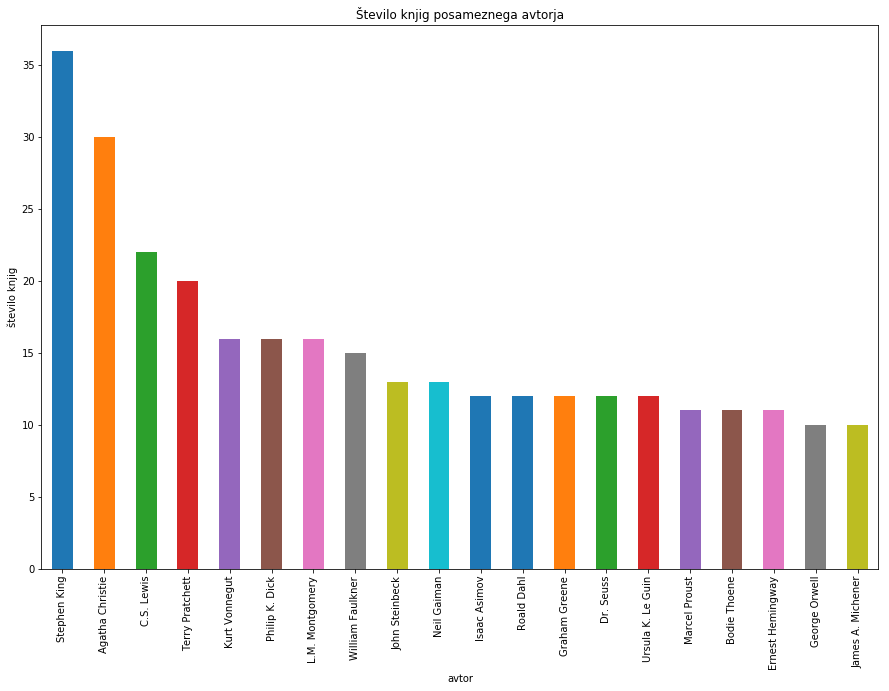

In [31]:
najuspesnejsi_avtorji.head(20).plot.bar()
plt.title('Število knjig posameznega avtorja')
plt.ylabel('število knjig')

Opazimo, da izstopa le nekaj avtorjev, potem pa se število priljubljenih knjig nekoliko uravnovesi, a je kljub temu precej visoko. Na tem mestu, se porodi vprašanje, koliko avtorjev, katerih knjige imajo vsaj 10000 ocen (da ima po moji oceni omembe vredno število bralcev), je na lestvico prišlo zgolj z eno knjigo. To bom naredil tako, da bom najprej knjige pofiltriral po številu ocen, nato jih bom pogrupiral po avtorju in nazadnje prešteli tiste, ki so napisali zgolj eno knjigo. To bomo storili tako, da si bomo ustvarili pomožno tabelo in v njej podatke združili po številu knjig.

Tudi ta izsledek bomo predstavili na grafu.

Text(0.5, 0, 'število napisanih knjig')

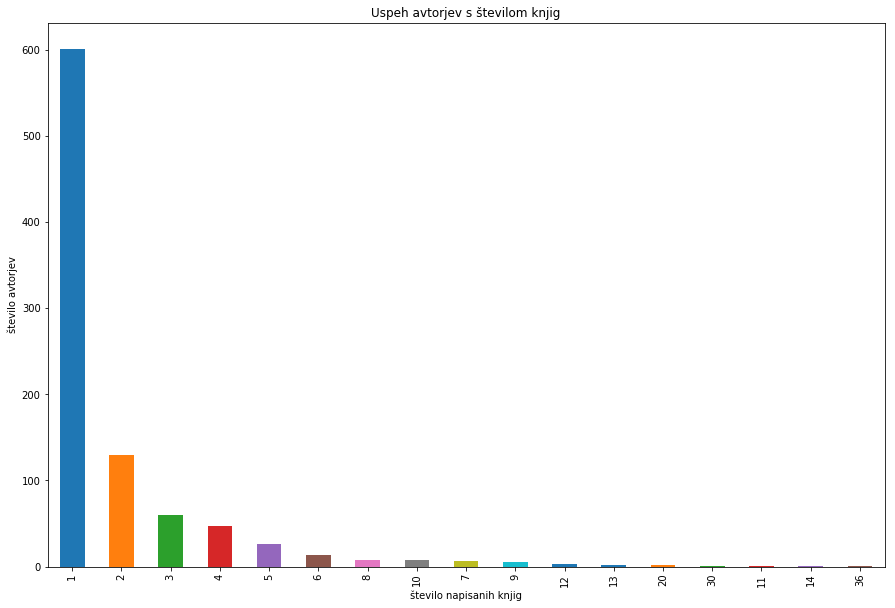

In [94]:
stevilo_knjig = avtor_knjiga[(avtor_knjiga.koliko_ocen >= 10000)].groupby('avtor').size().reset_index(name='st_knjig')
stevilo_knjig.groupby('st_knjig').size().sort_values(ascending=False).plot.bar()
plt.title('Uspeh avtorjev s številom knjig')
plt.ylabel('število avtorjev')
plt.xlabel('število napisanih knjig')

Izračunajmo delež avtorjev, ki so uspeli z več kot eno knjigo.

In [47]:
stevilo_knjig[stevilo_knjig.st_knjig > 1].count() / stevilo_knjig.count()

avtor       0.343886
st_knjig    0.343886
dtype: float64

Iz tega z lahkoto razberemo, da je ogromno takih avtorjev, ki so uspeli z eno knjigo. Ampak kljub temu se mi zdi zanimivo, da je tudi delež avtorjev, ki so napisali vsaj dve dobri knjigi med tistimi z 'omembe vrednim' številom ocen 0.34.

Preverimo, kako uspešni so avtorji glede na leto rojstva. To bomo storili tako, da bomo tabeli avtor_knjiga dodali stolpec 'petletje_avtor' in nato grupirali po petletkah in izrisal graf, ki prikazuje kako uspešni avtorji so se rojevali skozi čas. Na petletke bomo podatke pretvorili zato, da zgladimo krivuljo, saj bomo tako lažje razbrali rezultate.

Text(0, 0.5, 'število uspešnih avtorjev')

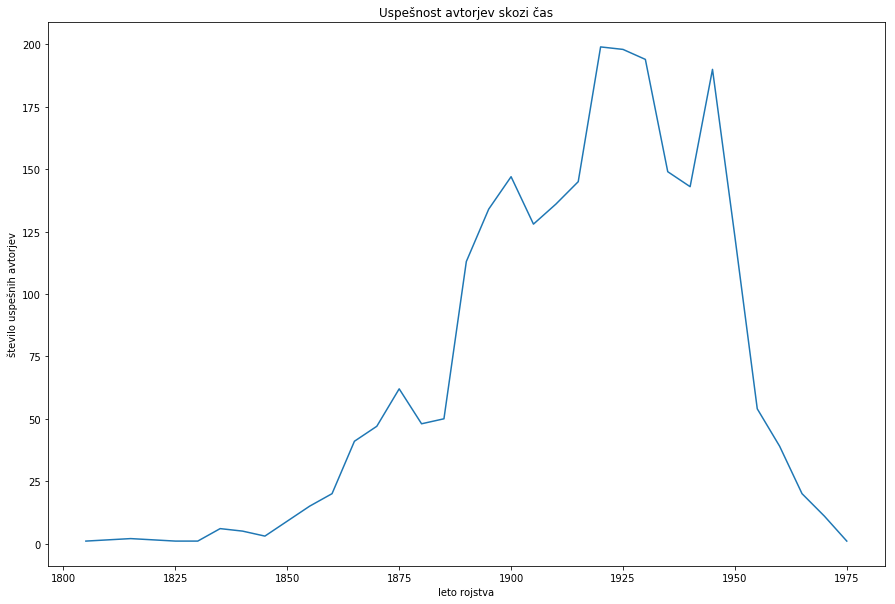

In [48]:
avtor_knjiga['petletje_avtor'] = (avtor_knjiga.leto_rojstva // 5) * 5
avtor_knjiga[avtor_knjiga.petletje_avtor > 1800].groupby('petletje_avtor').size().plot()
plt.title('Uspešnost avtorjev skozi čas')
plt.xlabel('leto rojstva')
plt.ylabel('število uspešnih avtorjev')

Najprej naj pripomnim, da so na grafu prikazani le avtorji, ki so bili rojeni po letu 1800, saj je graf tako bolj pregleden (pred letom 1800 se ne dogaja nič zanimivega), manjkajo pa tudi tisti, ki podatka o rojstvu niso imeli na spletni strani, odkoder sem zajemal podatke. 

Še vseeno pa opazimo, da je največ uspešnih avtorjev rojenih med letom 1920 in 1950. Zanimivo pa bi bilo primerjati ta graf z grafom, kjer bi imeli podatke o tem, v katerih letih so bile izdane najboljše knjige.

Sledeč graf bo torej nastal zelo podobno kot prejšnji, le da tukaj ne bomo razbijali na petletke, saj je krivulja dovolj gladka, da zlahka razberemo podatke, jih bomo pa omejili med leto 1940 in 2020, saj se prej ne dogaja nič zanimivega, kasneje od leta 2020 pa se načeloma ne bi smelo. Žal pa se zaradi napak na spletni strani pojavijo podatki, ki segajo izven okvirov mogočega in jih bomo zaradi dovoljšnjega števila ostalih podatkov ignorirali.

Text(0, 0.5, 'število izdanih knjiga')

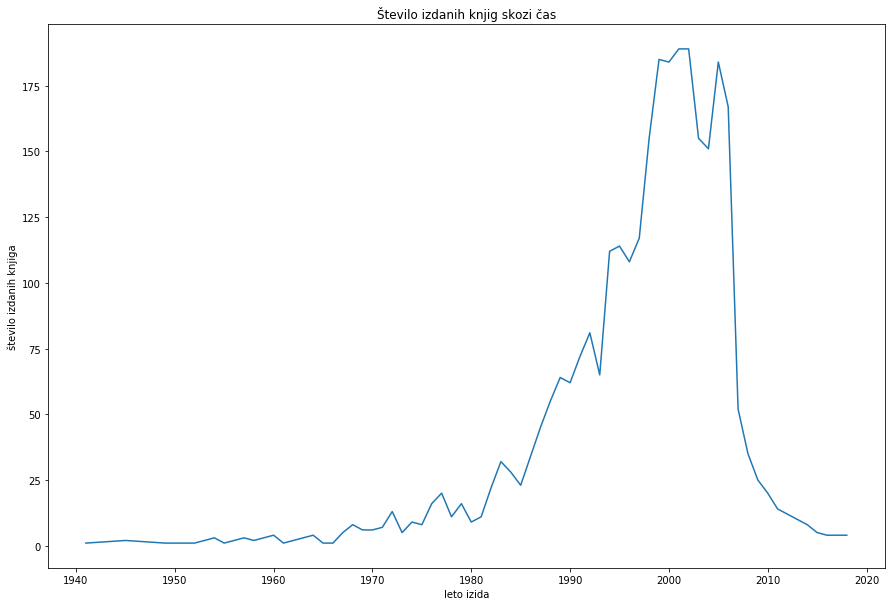

In [49]:
avtor_knjiga[(avtor_knjiga.izdano > 1940) & (avtor_knjiga.izdano < 2020)].groupby('izdano').size().plot()
plt.title('Število izdanih knjig skozi čas')
plt.xlabel('leto izida')
plt.ylabel('število izdanih knjiga')

Kot laho vidimo, se je 'hrib' premaknil nekoliko v desno in da je večina knjig skoncentrirana na konec 20. stoletja oz. sega rahlo v 21. stoletje. Iz tega lahko zaključimo dvoje. Prvič, bralci so bolj naklonjeni novejšim knjigam, hkrati pa zaradi neobstoja interneta do zadnje četrtine prejšnjega stoletja, ostale starejše knjige niso bile tako ocenjane kot novejše knjige. Drugič, lahko predvidevamo, da se najbolj izdaja knjige po petdesetih letih avtorja. Vendar pa slednjo hipotezo dodatno potrdimo z grafom. Pri tem se bomo v osnovi omejili le na tiste avtorje, za katere imamo ustrezne podatke in vzeli 20 najboljših njih. V ta namen bomo pripravili pomožne tabele, si izdelali slovarje in jih potem združili, da bomo lahko narisali primeren graf.

In [51]:
# pomožna tabela s številom knjig in podatki o avtorju.
stevilo_knjig = avtor_knjiga[
    avtor_knjiga.leto_rojstva > 1800
    ].groupby(
        ['ID_avtorja','avtor']
    ).size().reset_index(
        name='st_knjig'
    ).sort_values(
        ascending=False, by='st_knjig'
    )
stevilo_knjig = stevilo_knjig[stevilo_knjig.st_knjig > 6]
stevilo_knjig

stevilo_knjig = pd.merge(stevilo_knjig, avtorji)

Text(0, 0.5, 'leto izida po avtorjevem rojstvu')

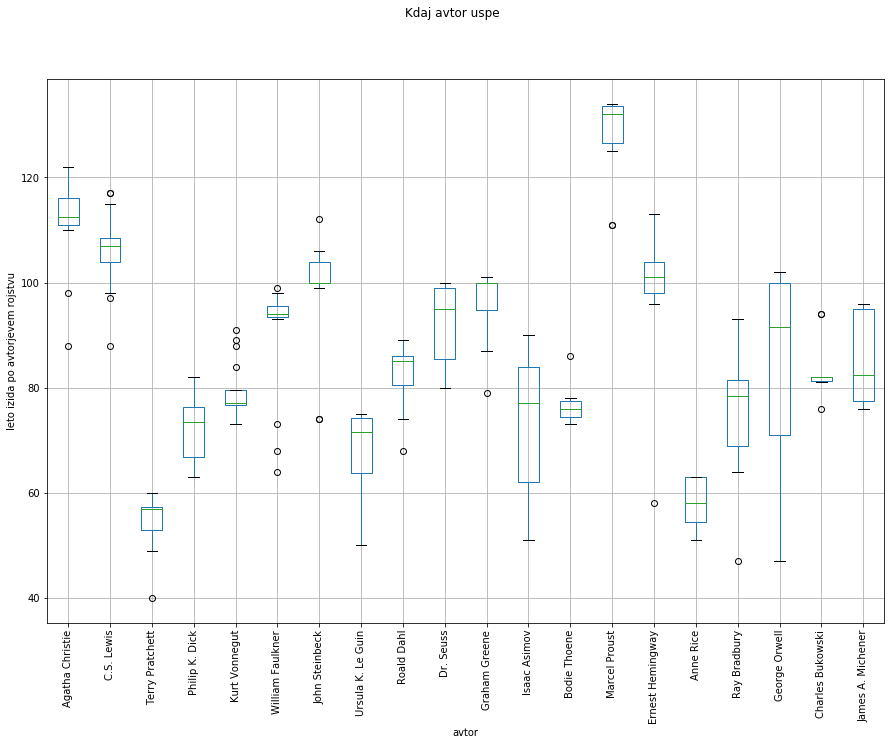

In [52]:
# naredimo slovar, kjer za vsakega avtorja zabeležimo najstarejšo in najmlajšo knjigo in odštejemo leto rojstva avtorja
# da bo graf pregleden, bomo vzeli le prvih 20 avtorjev z ustreznimi podatki
# pogoj izdano > -1000 je zato, da se izognemo vrsticam z neustreznimi podatki (NaN)

# naredimo si slovar avtorjev, ki nas zanimajo
avt = {}
for avtor, rojstvo in zip(
    stevilo_knjig.avtor.head(20),
    stevilo_knjig.leto_rojstva.head(20)
):
    avt[avtor] = [rojstvo]

# vsakemu avtorju dodamo letnice izidov njegovih knjig
for avtor, izdano in zip(
    avtor_knjiga[avtor_knjiga.izdano > -1000].avtor, 
    avtor_knjiga[avtor_knjiga.izdano > -1000].izdano
):
    if avtor in avt:
        avt[avtor].append(int(izdano) - avt[avtor][0])
        
# z None dopolnimo prazne prostorčke, da bomo lahko tvorili tabelo
for item in avt:
    del avt[item][0]
    while len(avt[item]) != 30:
        avt[item].append(None)

        
zlata_leta_avtorja = pd.DataFrame.from_dict(avt)
zlata_leta_avtorja.boxplot(
    column=[
        avtor for avtor in avt.keys()
    ],
    rot=90
)
plt.suptitle('Kdaj avtor uspe')
plt.xlabel('avtor')
plt.ylabel('leto izida po avtorjevem rojstvu')


Res opazimo, da so bila najbolj brana dela izdana po petdesetih letih. Ampak iz tega grafa lahko razberemo še nekoliko več. Razen pri dveh avtorjih (Isaac Asimov in George Orwell) opazimo, da so najbolj brana dela izšla v roku dvajsetih let. Opazimo tudi, da so brki zelo neenakomern dolžine pri posameznem avtorju, kar pove, da so nekateri avtorji po svojem uspehu zaključili s pisanjem priljubljenih knjig (tisti ki imajo spodnji brk daljši) nekateri pa so uspeli že kar hitro na začetku, in po kratkem premoru ponovno napisali dobro knjigo (daljši zgornji brk).

Poiščimo še najboljšo knjigo med vsemi.

In [79]:
# omejili se bomo na knjige z več kot 1000000 ocen
knjige[knjige.koliko_ocen > 1000000].sort_values('ocena', ascending=False).head(1)

,naslov,ID_avtorja,ocena,koliko_ocen,tocke,stevilo_glasov,vsebina,vezava,stevilo_strani,izdano,dolzina_opisa,petletje
ID_knjige,,,,,,,,,,,,
5,Harry Potter and the Prisoner of Azkaban (Harr...,1077326,4.55,2260802,278177,2956,Harry Potter's third year at Hogwarts is full ...,mass market paperback,435.0,2004.0,1236.0,2000.0


Na prvem mestu je pričakovano ena izmed knjig Harry Potter.

#### Povzetek
- največ dobrih knjig je napisal Stephen King
- 34 % najbolj branih avtorjev je napisalo vsaj 2 uspešni knjigi
- največ uspešnih avtorjev je rojenih nekje med letom 1890 in 1950
- največ knjig izide po avtorjevem petdesetem letu

### Hipoteze, ki zadevajo oceno knjige in točke

V tem razdelku nas bodo zanimale ocene in točke knjig. Ta dva podatka bi verjetno morala biti povezana. Na kakšen način, pa nam bo najlažje predstavil kakšen graf in izračum.

Najprej si poglejmo število posameznih ocen in njihovo povprečje.

Text(0, 0.5, 'število knjig')

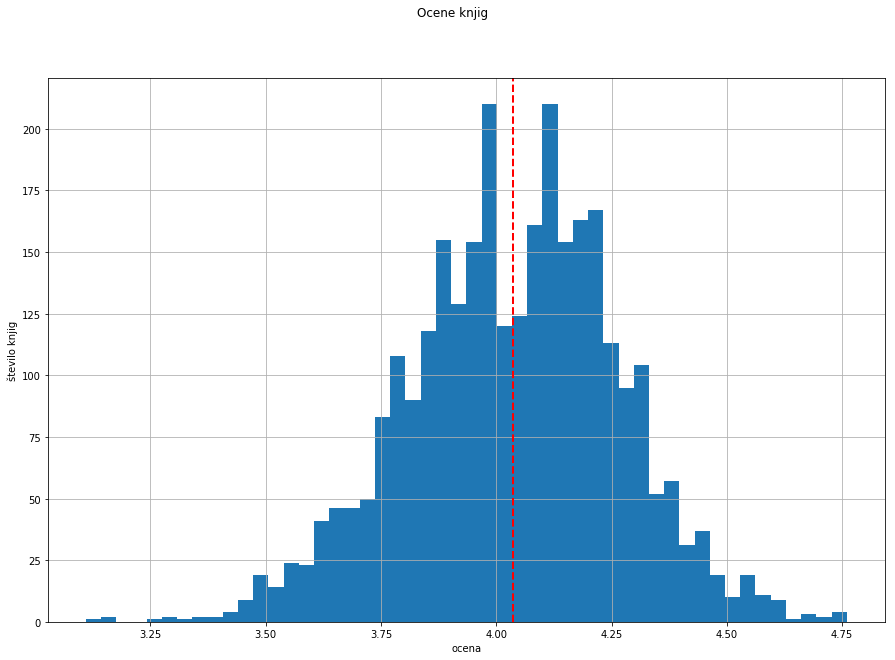

In [80]:
knjige.ocena.hist(bins=50)
plt.axvline(knjige.ocena.mean(), color='r', linestyle='dashed', linewidth=2)
plt.suptitle('Ocene knjig')
plt.xlabel('ocena')
plt.ylabel('število knjig')

Graf ni nič kaj presenetljivega. Vse ocene so višje od 3, kar je pričakovano glede na izbor podatkov. Najbolj brane knjige imajo torej v povprečju oceno malo nad 4, kar nakazuje črtkana navpična črta. 

Primerjajmo sedaj oceno knjige in njene točke.

Text(0, 0.5, 'točke')

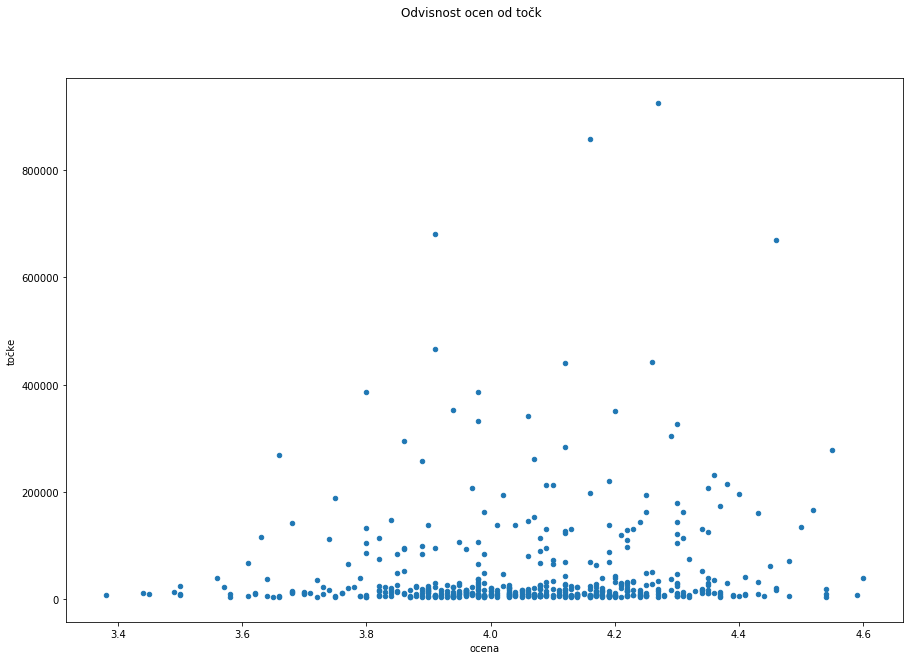

In [81]:
knjige[(knjige.stevilo_glasov > 50) & (knjige.koliko_ocen > 1000)].plot.scatter('ocena', 'tocke')
plt.suptitle('Odvisnost ocen od točk')
plt.xlabel('ocena')
plt.ylabel('točke')

Za vzorec smo vzeli le tiste knjige, ki imajo veliko število glasov in ocen, saj sicer rezultati niso dovolj objektivni. Opazimo, da točke in ocena nista zares tesno povezani, sicer je opazno da s tem ko narašča ocena, narašča tudi število točk, ampak ne prav drastično. Še vedno je veliko knjig, ki imajo nizko število točk in visoko oceno. Ker je veliko večje število ocen kot točk, se bomo od zdaj naprej osredotočili na ocene, saj so bolj relavantne.

Po mojem mnenju ima vpliv na oceno tudi dolžina opisa knjige. Menim, da opis ne sme biti predolg, saj tako razkrije preveč vsebine.

Text(0, 0.5, 'število knjig')

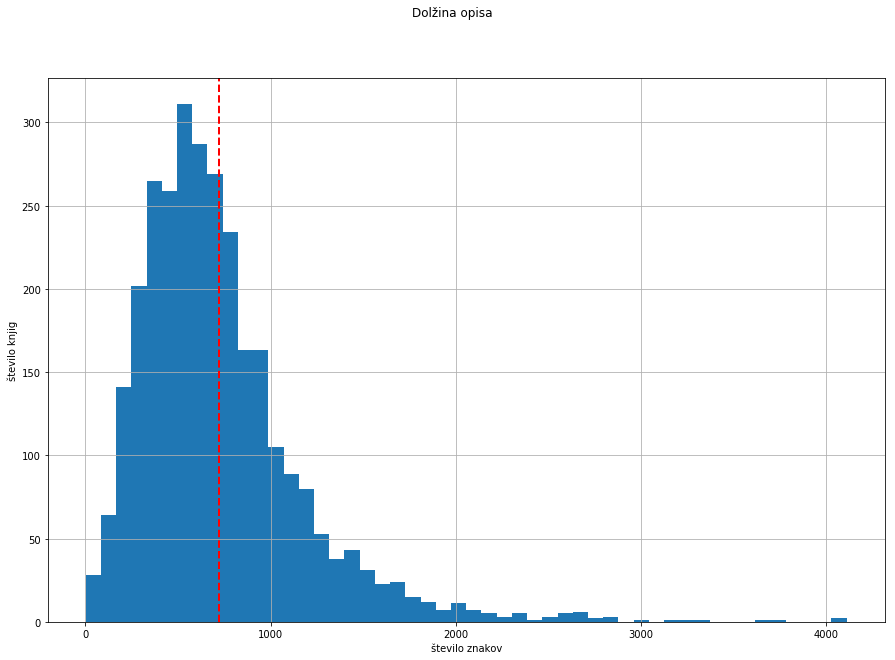

In [95]:
knjige['dolzina_opisa'] = knjige.vsebina.str.len()
knjige['dolzina_opisa'].hist(bins=50)
plt.axvline(knjige.dolzina_opisa.mean(), color='r', linestyle='dashed', linewidth=2)
plt.suptitle('Dolžina opisa')
plt.xlabel('število znakov')
plt.ylabel('število knjig')

Graf prikazuje dolžino opisa knjige. Zanimalo nas bo dvoje. Ali je dolžina opisa povezana z oceno knjige in ali je dolžina opisa povezana z številom strani.

Text(0, 0.5, 'dolžina opisa')

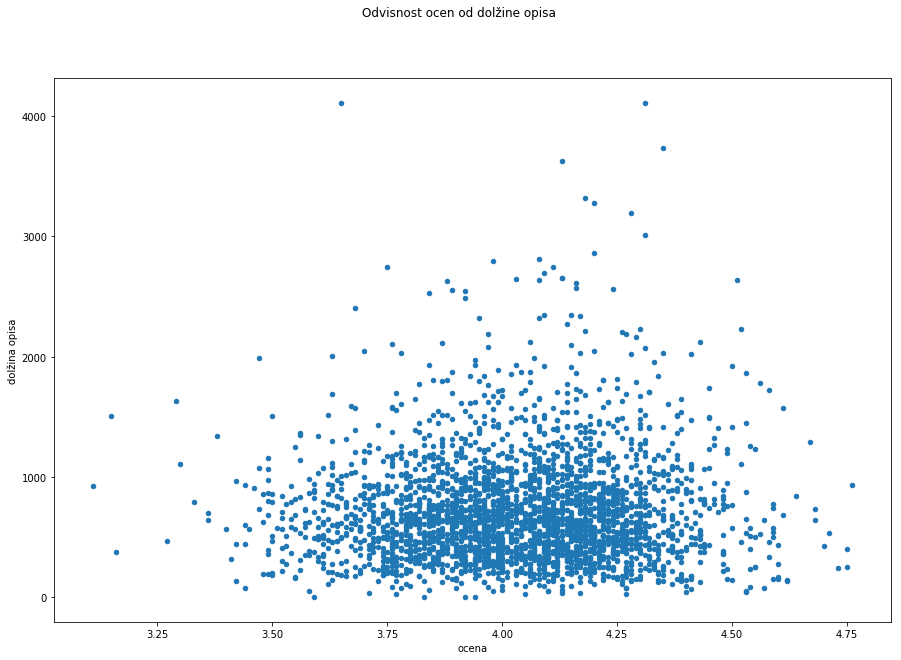

In [97]:
knjige.plot.scatter('ocena', 'dolzina_opisa')
plt.suptitle('Odvisnost ocen od dolžine opisa')
plt.xlabel('ocena')
plt.ylabel('dolžina opisa')

Razen nekaterih izjem opazimo, da je ocena nakako povezana z dolzino opisa, saj se točke približujejo krožnici. To pomeni, da najboljše in najslabše knjige imajo kratek opis, kar se zdi smiselno, saj tako bralec najmanj ve kaj pričakovati. Zato ga knjiga lahko razočara ali pa toliko bolj navduši. 
Še vedno pa opazimo, da je med najboljšimi knjigami, generalno gledano, več knjig s kratkim opisom, kar pritrjuje naši hipotezi.

Zdaj pa še preverimo ali sta povezana dolžina opisa in število strani.

Text(0, 0.5, 'dolžina opisa')

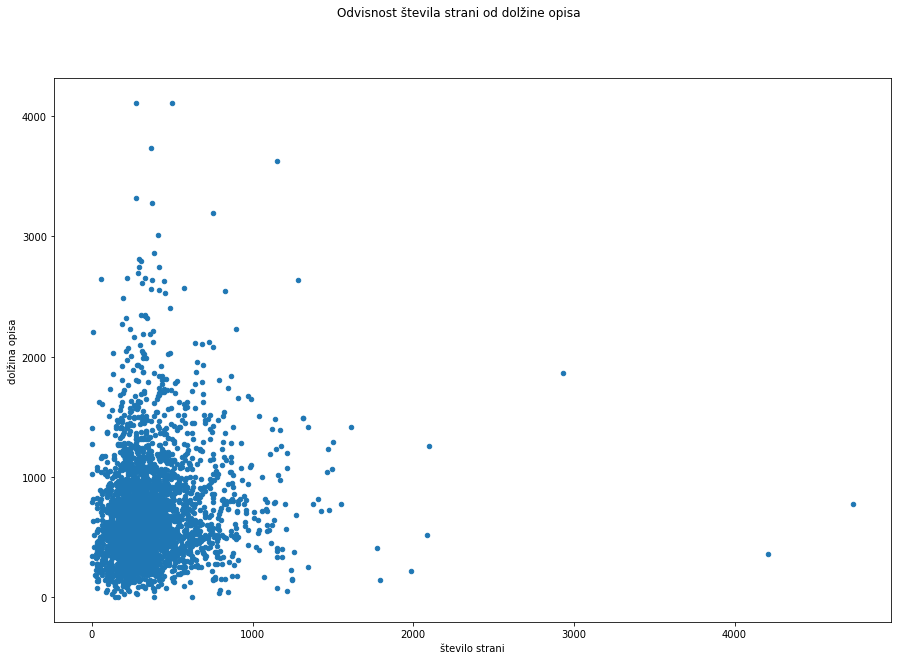

In [100]:
knjige[knjige.stevilo_strani < 6000].plot.scatter('stevilo_strani', 'dolzina_opisa')
plt.suptitle('Odvisnost števila strani od dolžine opisa')
plt.xlabel('število strani')
plt.ylabel('dolžina opisa')

Rezultat je nekoliko presenetljiv, saj lahko vidimo, da knjige, ki so kratke imajo zelo različno dolžino opisa, medtem ko imajo knjige z več stranmi krajši opis.

Zanimala nas bo še povprečna ocena knjig skozi čas. Vemo že, da je v zadnjem času izdanih več dobrih knjig kot, jih je bilo na začetku dvajsetega stoletja. Vprašanje pa je ali so tudi v povprečju boljše. Narišimo graf, ki bo prikazoval, kako se je povprečna ocena spreminjala skozi čas, najprej pa dodajmo še stolpec 'petletje', ki bo predstavljal v katerem petletju je knjiga bila izdana, saj bo tako graf bolj pregleden.

Text(0, 0.5, 'povprečna ocena')

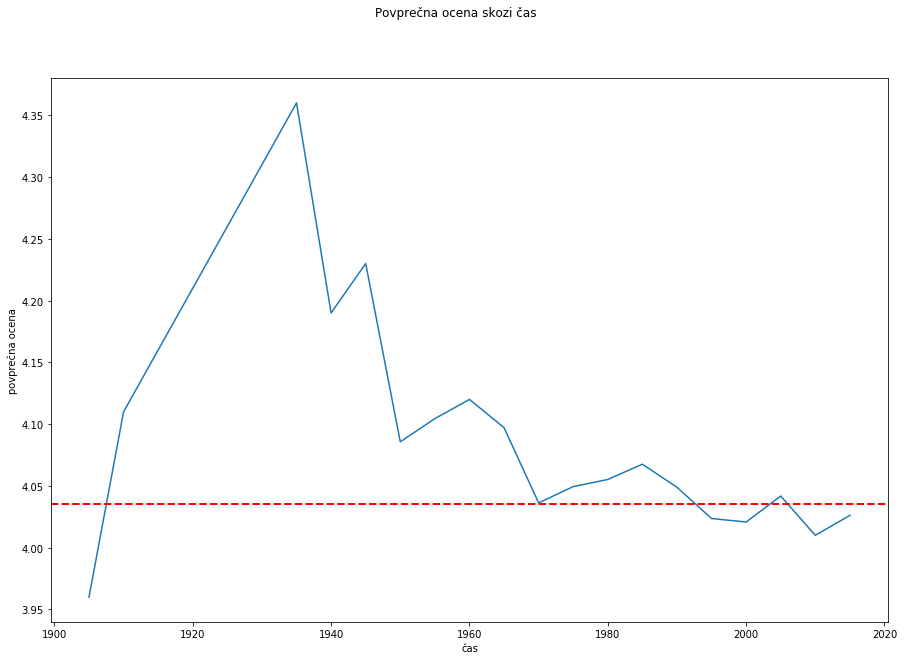

In [85]:
knjige['petletje'] = 5 * (knjige.izdano // 5)
knjige[knjige.izdano < 2020].groupby('petletje').ocena.mean().plot()
plt.axhline(knjige.ocena.mean(), color='r', linestyle='dashed', linewidth=2)
plt.suptitle('Povprečna ocena skozi čas')
plt.xlabel('čas')
plt.ylabel('povprečna ocena')

Opazimo, da se je povprečna ocena hitro dvignila, po letu 1930 pa je z manjšimi popravki kar hitro opadala. To nam lahko pove dvoje. Prvič, da so bile včasih knjige boljše, drugič pa nam to lahko pove, da starih knjig, ki so slabe, nihče ne bere in se zato ne pojavljajo med najbolj branimi. Če se ozremo na rdečo črto, lahko zaključimo, da je veliko bolj verjetna druga možnost, saj opazimo, da v zadnjem času ni prav velikih variiranj v poprečni oceni in se kar dobro drži povprečja.

#### Povzetek
- ocene so pričakovano nadpovprečne, povprečje vseh pa je malo več kot 4
- ocene in točke so neprepričljivo povezane
- dolžina opisa na spletni strani vpliva na oceno po principu 'manj je več'
- daljša kot je knjiga, krajši ima opis na spletni strani
- zadnje čase je povprečna ocena blizu povprečne ocene vseh časov

### Vezava in nacionalnost

Posvetili se bomo še vezavi knjig.

In [86]:
knjige.groupby('vezava').size().sort_values(ascending=False)

vezava
paperback                2371
hardcover                 315
mass market paperback     245
kindle edition             14
ebook                       9
unknown binding             4
audio cassette              4
published                   4
paper                       3
boxed set                   3
mp3 cd                      2
trade paperback             2
cloth                       2
board book                  2
audio cd                    2
library binding             1
pasta blanda                1
relié                       1
brochura                    1
leather bound               1
dtype: int64

Ker so podatki dokaj nekonsistentko vnešeni, opazimo, da imajo nekateri zajeti podatki vezavo navedeno z velikimi začetnicami, druge z malimi. Da bomo torej podatke lažje obravnavali, bomo obstoječ stolpec 'povozili' z enakim stolpcem z malimi začetnicami.

In [87]:
knjige['vezava'] = knjige.vezava.str.lower()
knjige.groupby('vezava').size().sort_values(ascending=False)

vezava
paperback                2371
hardcover                 315
mass market paperback     245
kindle edition             14
ebook                       9
unknown binding             4
audio cassette              4
published                   4
paper                       3
boxed set                   3
mp3 cd                      2
trade paperback             2
cloth                       2
board book                  2
audio cd                    2
library binding             1
pasta blanda                1
relié                       1
brochura                    1
leather bound               1
dtype: int64

Najpopularnejša je več kot očitno papirnata vezava, sledi pa ji vezava s trdimi platnicami, kar ni presenetljivo. Bolj zanimivo, a razveseljujoče, se mi zdi, da je tako malo knjig v elektronski obliki, glede na to da živimo v digitalni dobi. 

Nekoliko čudno pa se mi zdi da se med najpopularnejšimi knjigami dvajsetega stoletja pojavijo mp3 CD, audio CD, in kasete. Le kam gre ta svet ...

Poglejmo si še narodnost avtorjev in nekaj analize v povezavi z narodnostjo. Za začetek, bomo iz kraja rojsta poskusili zajeti državo in privzeli, da predstavlja avtorjevo narodnost. Potem bomo preverili, ali je kakšen izmed avtorjev slovenski.

Text(0, 0.5, '')

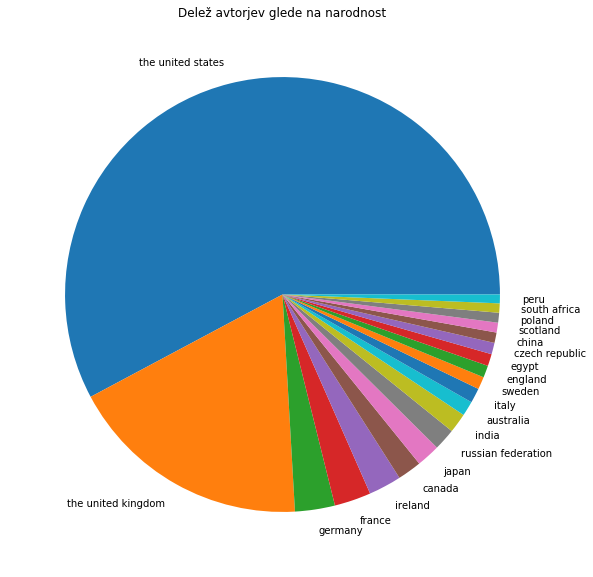

In [88]:
avtor_knjiga['kraj_rojstva'] = avtor_knjiga.kraj_rojstva.str.lower()
avtor_knjiga['narodnost'] = avtor_knjiga.kraj_rojstva.str.split(', ')

vse_narodnosti = {'narodnost' : [], 'id_avtor' : []}
for narodnost, id_avtorja in zip(avtor_knjiga['narodnost'], avtor_knjiga['ID_avtorja']):
    try:
        vse_narodnosti['narodnost'].append(narodnost[-1])
        vse_narodnosti['id_avtor'].append(id_avtorja)
    except:
        pass

vse_narodnosti = pd.DataFrame.from_dict(vse_narodnosti)
vse_narodnosti.groupby('narodnost').size().sort_values(ascending=False).head(20).plot.pie()
plt.title('Delež avtorjev glede na narodnost')
plt.ylabel('')

Hitro opazimo, da skoraj polovica vseh avtorjev, katerih podatke o izvorni državi imamo, prihaja iz ZDA. Sledi Združeno Kraljestvo, ki tudi nekoliko izstopa. Po mojem mnenju razlog tiči v tem, da je angleščina najbolj razširjen jezik in zato lahko skoraj vsak bere te knjige v izvornem jeziku in posledično knjigo bolje doživi, kot pa če bi bile prevedene.

Podatki niso povsem natančni, saj nekateri avtorji nimajo podatka o državi kjer se mesto nahaja in zato imamo lahko primer avtorja, ki je rojen v New Yorku, pa ni štet pod ZDA. Ampak, ker so te napake zanemarljive, bomo to dejstvo ignorirali. 

Prav tako pa lahko iz zgornje tabele hitro vidimo, da na seznamu ni nobenega slovenskega avtorja. 

#### Povzetek
- najpogostejša je papirnata vezava in trde platnice
- največ avtorjev prihaja iz ZDA in VB
- noben avtor ni slovenskega porekla

## Zaključek

V analizi sem torej obdelal zajete podatke. Najprej sem se ukvarjal s tem, kateri avtorji so najuspešnejši. Potem sem obravnaval, kdaj, glede na leto rojstva, so izšle njihove najbolj brane knjige. Pregledal sem tudi kako se ocena spreminja skozi čas, in v kakšni povezavi je število točk z oceno. Ta ni bila nič kaj zgovorna, zato sem se omejil zgolj na ocene in nadaljeval z analizo. Preveril sem tudi katere vezave so popularne in katera norodnost avtorja je za bralce najbolj privlačna.

Iz same analize sem se veliko naučil. Že s samim zajemom podatkov sem se pozabaval in odkrival skrivnosti slabega html-ja spletnih strani. Ko pa sem končno zajel podatke, je bila njihova obdelava dokaj zanimiva in mi je prikazala nekaj zelo zanimivih rezultatov, za katere si morda sprva ne bi mislil, da me bodo sploh zanimali.

### Dodatek - za šalo

Ta del ni del projekta, je pa dodan zato, ker se mi zdi blazno zabavno.

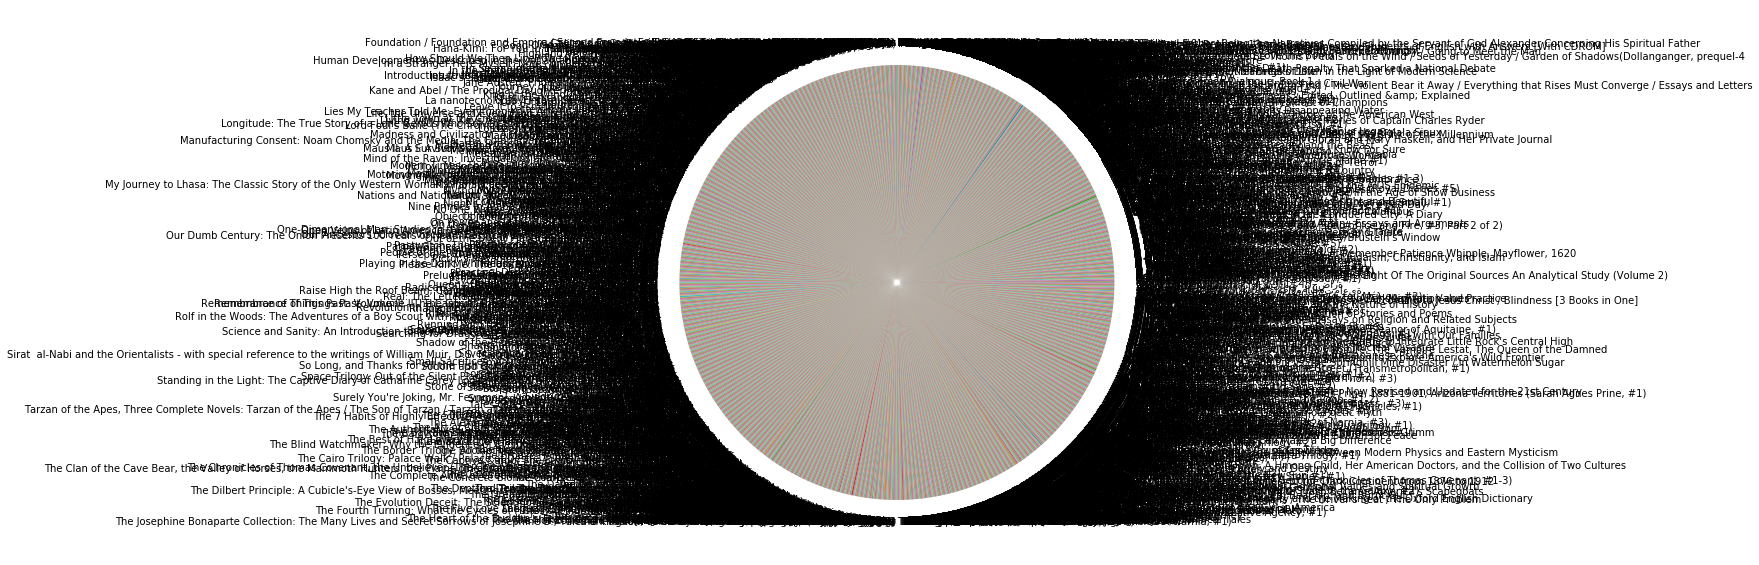

In [89]:
avtor_knjiga.groupby('naslov').size().plot.pie()

Na zgornjem grafu se DOBRO vidi, da imajo knjige zelo veliko različnih naslovov.